In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import astropy.wcs as WCS
from astropy.table import Table
from astropy import units as u

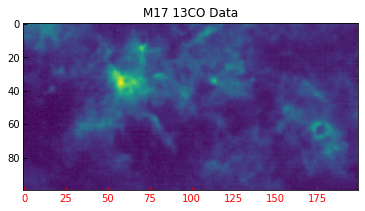

In [22]:
path_M17_13 = '../Real_Data_Test/Real_Data/M17_13CO_Part.fits'
path = path_M17_13
real_data_M17 = fits.getdata(path)
plt.title('M17 13CO Data')
plt.imshow(real_data_M17.sum(0))
plt.show()

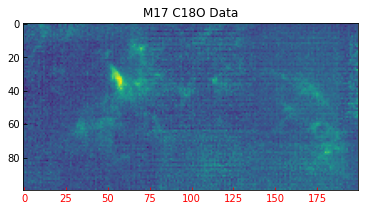

In [24]:
path_M17_18 = '../Real_Data_Test/Real_Data/M17_C18O_Part.fits'
path = path_M17_18
real_data_M17_18 = fits.getdata(path_M17_18)
plt.title('M17 C18O Data')
plt.imshow(real_data_M17_18.sum(0))
plt.show()

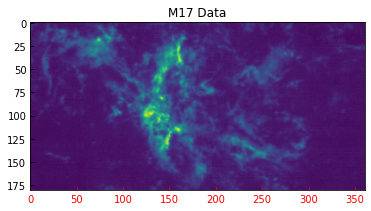

In [18]:
path_M16 = '../Real_Data_Test/Real_Data/hdu0_mosaic_L.fits'
path = path_M16
real_data_M16 = fits.getdata(path_M16)
plt.title('M17 Data')
plt.imshow(real_data_M16.sum(0))
plt.show()

## Installation and use of FacetClumps

In [5]:
# pip install FacetClumps==0.0.3

import FacetClumps
from FacetClumps.Detect_Files import Detect as DF_FacetClumps

## Detection Paremeters

### Input of FacetClumps (2D and 3D)
**RMS**: The RMS of the data.

**Threshold**: The minimum intensity used to truncate the signals. \
Default Value: 2\*RMS \
Recommended value: ['mean','otsu',n\*RMS]

**SWindow**: The scale of window function.\
Default Value: 3\
Recommended value: [3,5,7]

**KBins**: The coefficient used to calculate the number of bins for the eigenvalue.\
Default Value: 35\
Recommended value: [10,...,60]



**FwhmBeam**: The FWHM of the instrument beam, in pixels.\
Default Value: 2

**VeloRes**: The velocity resolution of the instrument, in channels.\
Default Value: 2

**SRecursionLBV**: The minimum area of a region in the spatial direction and the minimum length of a region in the velocity channels when a recursion terminates. Clumps also need to satisfy the conditions. [SRecursionLB,SRecursionV] for 3D, [SRecursionLB] for 2D.\
Default Value: [16,5]

**file_name**: File name.

**mask_name**: mask name, used to store region information. The index (starts with the number one) of each clump corresponds to the same number in the mask.

**outcat_name**: Used to store clump table in pixel coordinate system.

**outcat_wcs_name**: Used to store clump table in WCS coordinate system.

### Output information
**files**: Regional information and clump tables saved according to the customized file name.

**did_tables**: Detected information dictionary, whose keys is **[mask, outcat_table, outcat_wcs_table]**\
**mask**: Regional infromation.\
**outcat_table**: Clump table of pixel coordinate system.\
**outcat_wcs_table**: Clump table of WCS coordinate system.

In [6]:
#Get the RMS from the header
header = fits.getheader(path)
RMS = header['RMS']
print('RMS:',RMS)

RMS: 0.226616


In [ ]:
#2D

RMS = 0.23
Threshold = 2 * RMS # ['mean','otsu',n*RMS]
SWindow = 3 # [3,5,7]
KBins = 35 # [10,...,60]
FwhmBeam = 2
VeloRes = 2
SRecursionLBV = [16, 5] # [(2+FwhmBeam)**2,3+VeloRes]

SRecursionLB = SRecursionLBV[0]
did_FacetClumps = FacetClumps.FacetClumps_2D_Funs.Detect_FacetClumps(RMS, Threshold, SWindow, KBins,SRecursionLB,real_data_M16.sum(0))

In [12]:
#3D

RMS = 0.23
Threshold = 2 * RMS # ['mean','otsu',n*RMS]
SWindow = 3 # [3,5,7]
KBins = 35 # [10,...,60]
FwhmBeam = 2
VeloRes = 2
SRecursionLBV = [16, 5] # [(2+FwhmBeam)**2,3+VeloRes]

parameters = [RMS, Threshold, SWindow, KBins, FwhmBeam, VeloRes, SRecursionLBV]
file_name = path
mask_name = 'mask.fits'
outcat_name = 'outcat.csv'
outcat_wcs_name = 'outcat_wcs.csv'
did_tables_FacetClumps = DF_FacetClumps(file_name,parameters,mask_name,outcat_name,outcat_wcs_name)

100%|██████████| 33/33 [00:02<00:00, 16.26it/s]


Number: 173
Time: 51.74


In [13]:
# Obtain the reginal information, clump table of pixel coordinate system and WCS coordinate system from files.
regions_data = fits.getdata('mask.fits')
outcat_table = Table.read('outcat.csv')
outcat_wcs_table = Table.read('outcat_wcs.csv')

# Obtain the reginal information, clump table of pixel coordinate system and WCS coordinate system from retrun.
regions_data = did_tables_FacetClumps['mask']
outcat_table = did_tables_FacetClumps['outcat_table']
outcat_wcs_table = did_tables_FacetClumps['outcat_wcs_table']

In [14]:
print('Outcat_WCS_Table:\n',outcat_wcs_table)

Outcat_WCS_Table:
  ID Peak1  Peak2 Peak3   Cen1   Cen2 ... Size3  Peak   Sum   Volume Angle Edge
     deg    deg   deg    deg    deg  ...  pix    K      K     pix    deg      
--- ------ ----- ------ ------ ----- ... ----- ----- ------- ------ ----- ----
  1 11.733 0.350  7.359 11.735 0.349 ... 1.289 1.453  47.274     79    27    1
  2 12.633 0.825 17.027 12.627 0.827 ... 2.087 1.471 107.085    176    33    0
  3 12.708 0.692 17.360 12.712 0.695 ... 2.546 1.944 206.344    285    54    0
  4 12.817 0.600 17.027 12.821 0.594 ... 2.759 2.214 535.662    634   -43    0
  5 12.692 0.750 17.527 12.693 0.746 ... 2.652 1.941 242.251    298    36    0
  6 12.925 0.467 17.360 12.921 0.460 ... 1.530 1.359  68.938    109    51    0
  7 12.717 0.350 17.527 12.713 0.352 ... 1.942 1.810 202.797    311    18    0
  8 12.758 0.667 17.860 12.767 0.668 ... 2.327 1.876 163.360    247    23    0
  9 12.775 0.525 17.860 12.794 0.526 ... 3.147 2.506 779.211    836    50    0
 10 12.667 0.783 17.693 12.664 0.

#### Detection Plot

In [15]:
# Obtain the required information from output tables.
clump_center = np.c_[outcat_table['Cen1'],outcat_table['Cen2'],outcat_table['Cen3']]
clump_angle = outcat_table['Angle']
clump_edge = outcat_table['Edge']

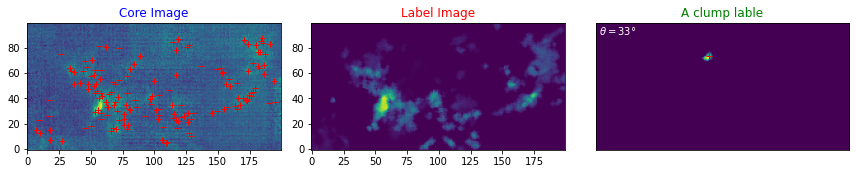

In [16]:
origin_data = real_data_M17_18

fig,(ax0,ax1,ax2)= plt.subplots(1,3, figsize=(12, 8))
for i in range(np.int(regions_data.max())):
    # Show the clumps which do not touch the edges.
    if clump_edge[i] == 0:
        center_x = clump_center[i][0]-1
        center_y = clump_center[i][1]-1
        ax0.plot(center_x,center_y,'r+')

#Obtain the region and angle of a clump. 
index = 1
clump_region_i_coords = np.where(regions_data == index+1)
clump_region_lable = np.zeros_like(origin_data)
clump_region_lable[clump_region_i_coords] = 1
ax2.text(2,origin_data.shape[1]-10,r'$\theta={}\degree$'.format(np.around(clump_angle[index],0)),color='white',fontsize=10 )
ax2.plot(clump_center[index][0]-1,clump_center[index][1]-1,'r+')

ax0.imshow(origin_data.sum(0))
ax1.imshow(regions_data.sum(0))
ax2.imshow(clump_region_lable.sum(0))
ax0.set_title('Core Image',fontsize=12,color='b')
ax1.set_title('Label Image',fontsize=12,color='r')
ax2.set_title('A clump lable',fontsize=12,color='g')
for ax in [ax0,ax1,ax2]:
    ax.invert_yaxis()
fig.tight_layout()
plt.xticks([]),plt.yticks([])
plt.show()

invalid keyvalue. [astropy.wcs.wcs]


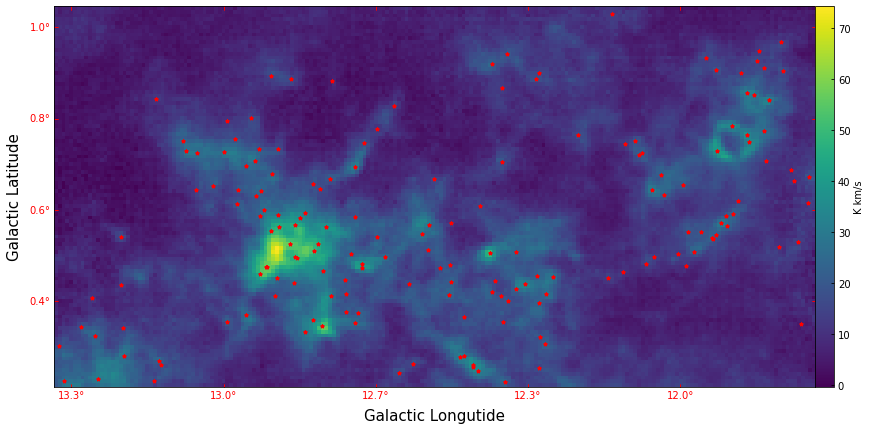

In [23]:
# path = path_M16
data_cube = fits.getdata(path)
data_header = fits.getheader(path)
wcs = WCS.WCS(data_header)

fig = plt.figure(figsize=(18,7))
ax = fig.add_subplot(111,projection=wcs.celestial)

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.color'] = 'red'
font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size' : 15,
}
plt.xlabel("Galactic Longutide",font2)
plt.ylabel("Galactic Latitude",font2)


for i in range(len(clump_center)):
    center_x = clump_center[i][0]-1
    center_y = clump_center[i][1]-1
    ax.plot(center_x,center_y,'r*',markersize = 4) 

lon = ax.coords[0]
lat = ax.coords[1]
lon.set_major_formatter("d.d")
lat.set_major_formatter("d.d")
lon.set_ticks(spacing=20 * u.arcmin)

gci = plt.imshow(data_cube.sum(axis=0)*0.166)#,cmap='gray'
cbar = plt.colorbar(gci,pad=0)
cbar.set_label('K km/s')
# plt.xticks([]),plt.yticks([])
# plt.savefig('Example_0.pdf', format='pdf', dpi=1000)
plt.show()